[*********************100%***********************]  1 of 1 completed

Test RMSE: 3.30424


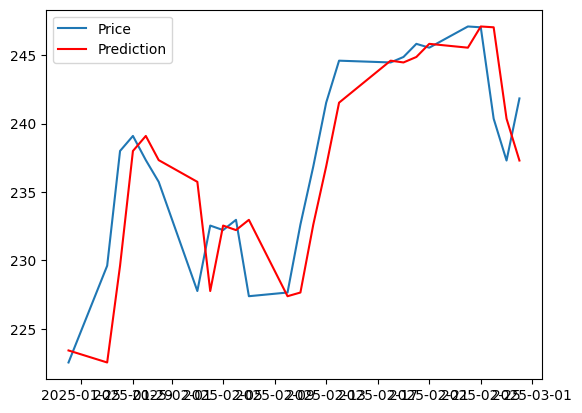

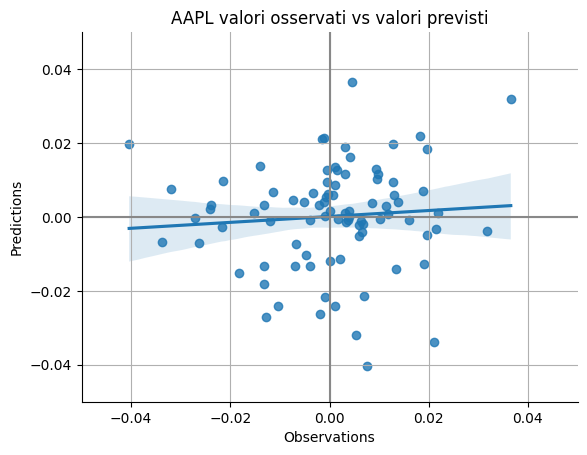

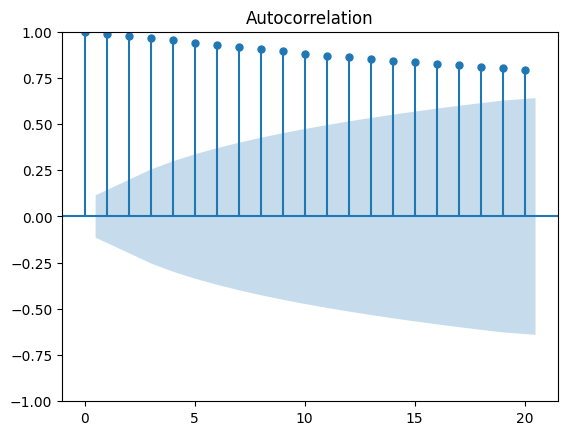

In [9]:
#####---------------------------- MODELLO DI PERSISTENZA
from sklearn.metrics import mean_squared_error
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf

import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
import seaborn as sns

stocks = ['AAPL']                       # Definiamo il ticker
start = datetime(2024, 1, 1)              # Data di inizio del record
data = yf.download(stocks, start=start)   # Scarichiamo i dati
close = data.loc[:, "Close"]              # Selezioniamo solo i prezzi di chiusura



predictions = close.shift(1)
RMSE = np.sqrt(mean_squared_error(close[int(len(close) * 0.7):], predictions.iloc[int(len(close) * 0.7):])) # RMSE
print('Test RMSE: %.5f' % RMSE)
plt.plot(close.iloc[-25:], label='Price')
plt.plot(predictions[-25:], color='red', label='Prediction')
plt.legend()
plt.show()


rend_close=close.pct_change()
rend_predictions=predictions.pct_change()

plt.show()
price_pred = pd.concat([rend_close.iloc[-int(len(close) * 0.3):], rend_predictions.iloc[-int(len(close) * 0.3):]], axis=1)

price_pred.columns = ['Price', 'Prediction']
fig, ax = plt.subplots()
ax = sns.regplot(data=price_pred, x=price_pred['Price'], y=price_pred['Prediction'])
plt.xlabel('Observations')
plt.ylabel('Predictions')
plt.title('AAPL valori osservati vs valori previsti')
ax.grid(True, which='both')
ax.axhline(y=0, color='#888888')
ax.axvline(x=0, color='#888888')
sns.despine(ax=ax, offset=0)
plt.xlim(-0.05, 0.05)
plt.ylim(-0.05, 0.05)

plt.show()
acf_coef=acf(close)
plot_acf(close, lags=20)
plt.show()